# Capítulo 6: Árbol de Decisión

## <span style="color:green">1. Clasificación</span>

In [64]:
#Importar los bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [66]:
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/main/Capitulo_6/"
#Complementos con la dirección especifica de la base de datos que queremos.
COMEDIANTES = "Comediantes.csv"
#Declara la función para extraer datos
def extraer_datos(root, database):
    csv_path = root + database
    return pd.read_csv(csv_path)

In [68]:
#Checa los datos y extrae el dataframe 
#Chica, mucho ojo con las variables. Escribirlas en mayúsculas como arriba. 
df = extraer_datos(DOWNLOAD_ROOT, COMEDIANTES)
#Es un dataframe chiquito pero útil :) 
df
#Recuerda que Go es el veredicto de si será o no será comediante

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


In [70]:
#Utiliza el label_encoder para asignar un valor numérico a Nacionalidad y a Go
from sklearn.preprocessing import LabelEncoder

def label_enconder(datos_categoria):
    le = LabelEncoder()
    df[datos_categoria] = le.fit_transform(df[datos_categoria])

variables = ['Nationality', 'Go']

for variable in variables:
    label_enconder(variable)
#verifica que las variables "Nacionality" y "Go" se cambiaron a valores numéricos 
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,1,0
1,42,12,4,2,0
2,23,4,6,0,0
3,52,4,4,2,0
4,43,21,8,2,1
5,44,14,5,1,0
6,66,3,7,0,1
7,35,14,9,1,1
8,52,13,7,0,1
9,35,5,9,0,1


In [72]:
#Separa en dos partes el dataframe 
y = df['Go']
X = df.drop('Go', axis=1)

In [74]:
#verifica que se haya hecho la separación
X

,Age,Experience,Rank,Nationality
0,36,10,9,1
1,42,12,4,2
2,23,4,6,0
3,52,4,4,2
4,43,21,8,2
5,44,14,5,1
6,66,3,7,0
7,35,14,9,1
8,52,13,7,0
9,35,5,9,0


In [76]:
#Carnita del asunto:Haz el clasificador de DecisionTree
    #Importa la función
from sklearn.tree import DecisionTreeClassifier
    #Haz el objeto 
tree_d = DecisionTreeClassifier()
    #Haz el ajuste
tree_d.fit(X, y)

DecisionTreeClassifier()

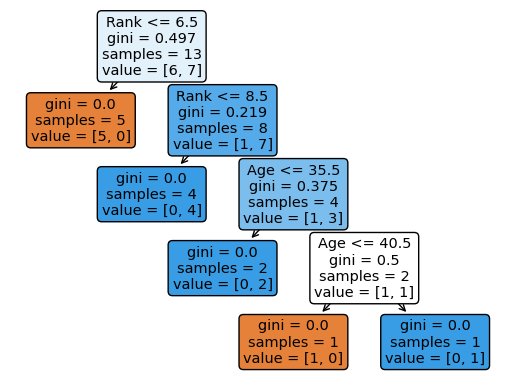

In [78]:
#Gráfica el árbol de decisión 
from sklearn import tree

tree.plot_tree(tree_d, feature_names=X.columns, rounded=True, filled=True)
plt.show()

***

## <span style="color:green">2. Probabilidades</span>

También permite estimar probabilidades 🥳. Lo veremos con un ejemplo:

In [83]:
#Selecciona una persona aleatoria para estimar su probabilidad y juega con las variables
tree_d.predict_proba([[40, 8, 7, 1]])

C:\Users\miker\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0., 1.]])

👀 -El orden de las variables esta como: **Edad, experiencia, rango y nacionalidad**

El resultado esta como : lado izquierdo= No comediante - lado derecho=Comediante

---

## <span style="color:green">3. Regresión</span>

Los árboles de decisión 🌳 tambien pueden hacer regresiones lineales.

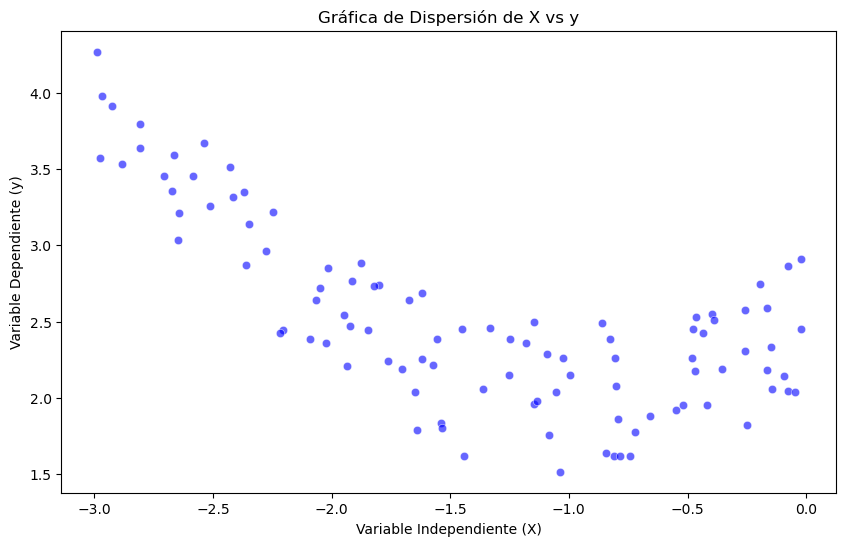

In [90]:
#Genera 100 número aleatorios y añade un poco de aleatoriedad 
m = 100
X = 3 * np.random.rand(m, 1) - 3
y = 2 + X +0.5 * X ** 2 + np.random.rand(m, 1)
#np.c_[([x])]
# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.6, edgecolors='w', linewidths=0.5)

# Añadir etiquetas y título
plt.xlabel('Variable Independiente (X)')
plt.ylabel('Variable Dependiente (y)')
plt.title('Gráfica de Dispersión de X vs y')
plt.show()

In [92]:
#Crea un  árbol de decisión con un hiperparametro de 2
from sklearn.tree import DecisionTreeRegressor

tree_r = DecisionTreeRegressor(max_depth=2)
tree_r.fit(X, y)

DecisionTreeRegressor(max_depth=2)

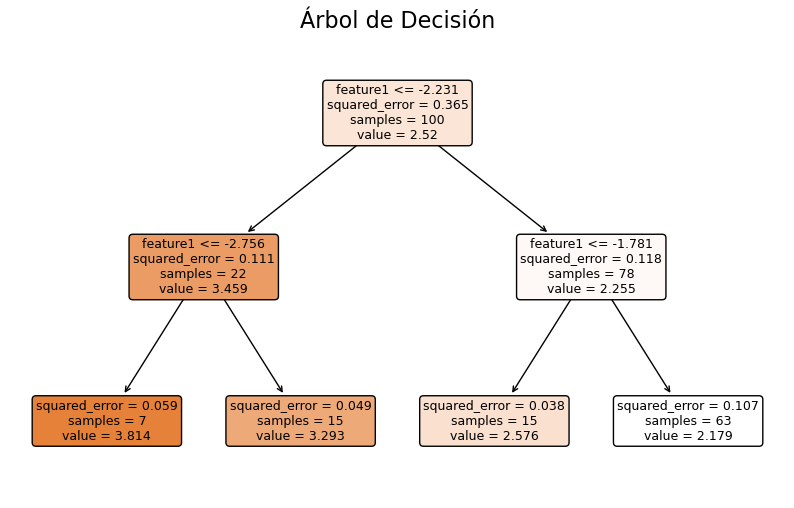

In [94]:
#Dale formato a tu arbolito bebé 
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

tree.plot_tree(tree_r, rounded=True, filled=True, fontsize=9, feature_names=['feature1', 'feature2', 'feature3'], class_names=['class1', 'class2'])

# Añadir un título
plt.title("Árbol de Decisión", fontsize=16)

# Mostrar la gráfica
plt.show()

Recuerda que pusimos una profundidad máxima de 2, esto lo decides tu con base a tus objetivos.

KEY: **mse**= Mean Square Error es equivalente al GINI. Te indica el nivel de impureza. **nsamples=** Cantidad de muestras por nodo. **nvalue=** Valor

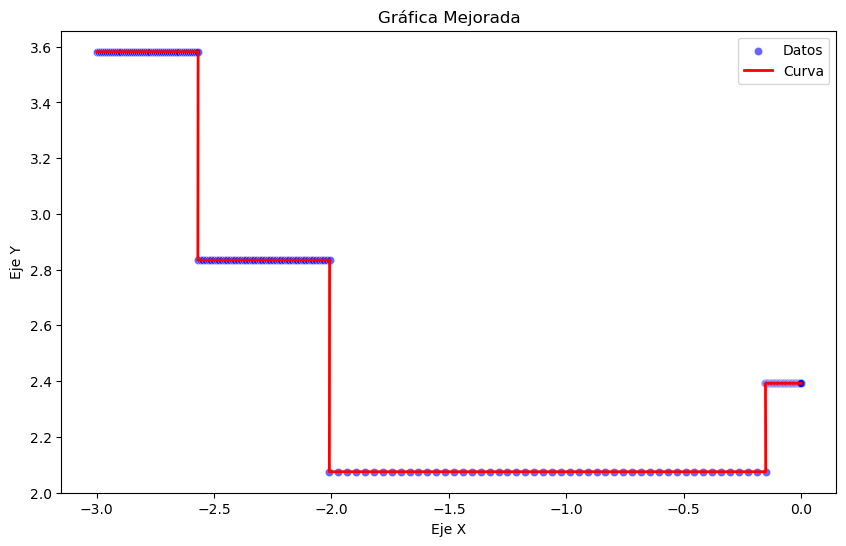

In [98]:
#Hacer gráfica toda complicada :(
# Datos originales
x_conca = np.concatenate([np.linspace(-3, -2.568), np.linspace(-2.569, -2.008), np.linspace(-2.009, -0.151), np.linspace(-0.152, 0)])
y_conca = np.concatenate([np.linspace(3.5818, 3.5818), np.linspace(2.834, 2.834), np.linspace(2.075, 2.075), np.linspace(2.392, 2.392)])

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar los puntos
plt.scatter(x_conca, y_conca, color='blue', alpha=0.6, edgecolors='w', linewidths=0.5, label='Datos')

# Graficar la línea continua
plt.plot(x_conca, y_conca, "r-", linewidth=2, label='Curva')

# Añadir etiquetas y título
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gráfica Mejorada')
plt.legend()

# Mostrar la gráfica
plt.show()


Los nodos se ven representados por cada linea rojo

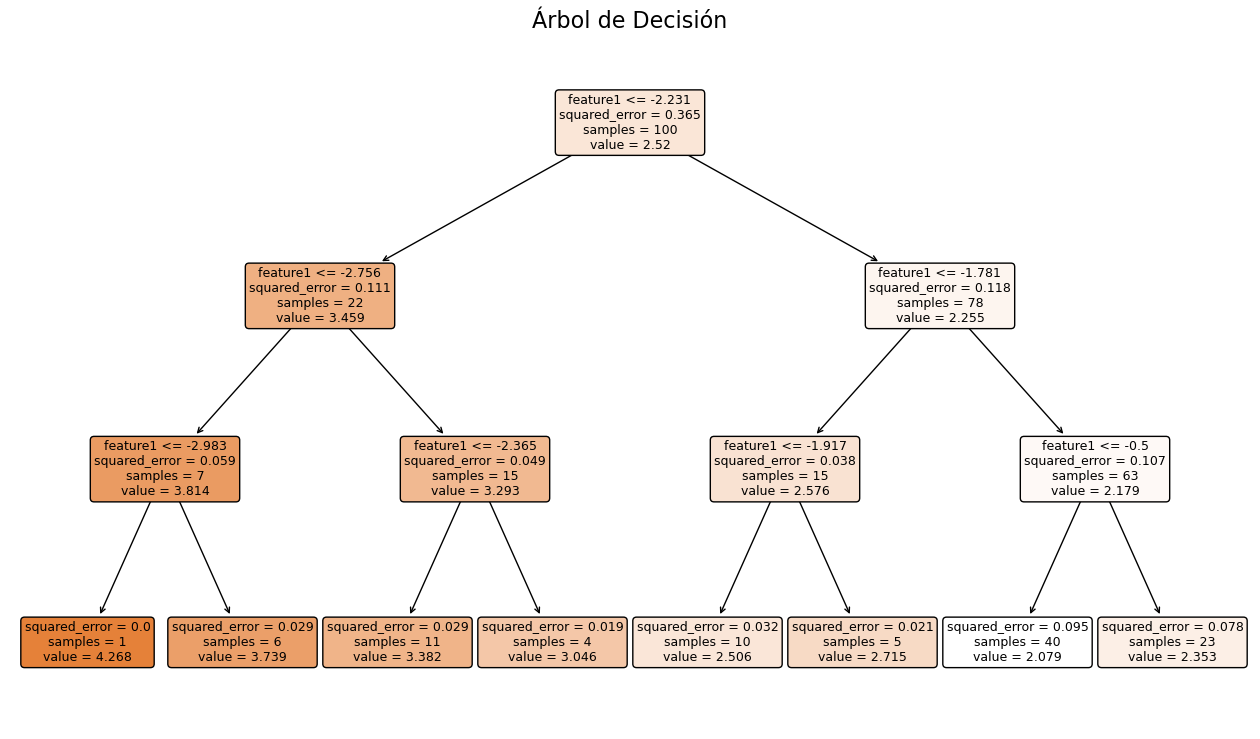

In [106]:
#Arreglar el sobreajuste poniendo una profundidad máxima mayor a la anterior. Ej: 3. 
tree_r = DecisionTreeRegressor(max_depth=3)

tree_r.fit(X, y)
#Gráficalo

plt.figure(figsize=(16, 9))

tree.plot_tree(tree_r, rounded=True, filled=True, fontsize=9, feature_names=['feature1', 'feature2', 'feature3'], class_names=['class1', 'class2'])

# Añadir un título
plt.title("Árbol de Decisión", fontsize=16)

# Mostrar la gráfica
plt.show()
#tree.plot_tree(arbol,rounded=True,filled=True,fontsize=15)Para hacer más grande la letra ajustar fontsize

In [108]:
#Haz un árbol de decisiones sin restricciones
tree_r = DecisionTreeRegressor()
tree_r.fit(X, y)

DecisionTreeRegressor()

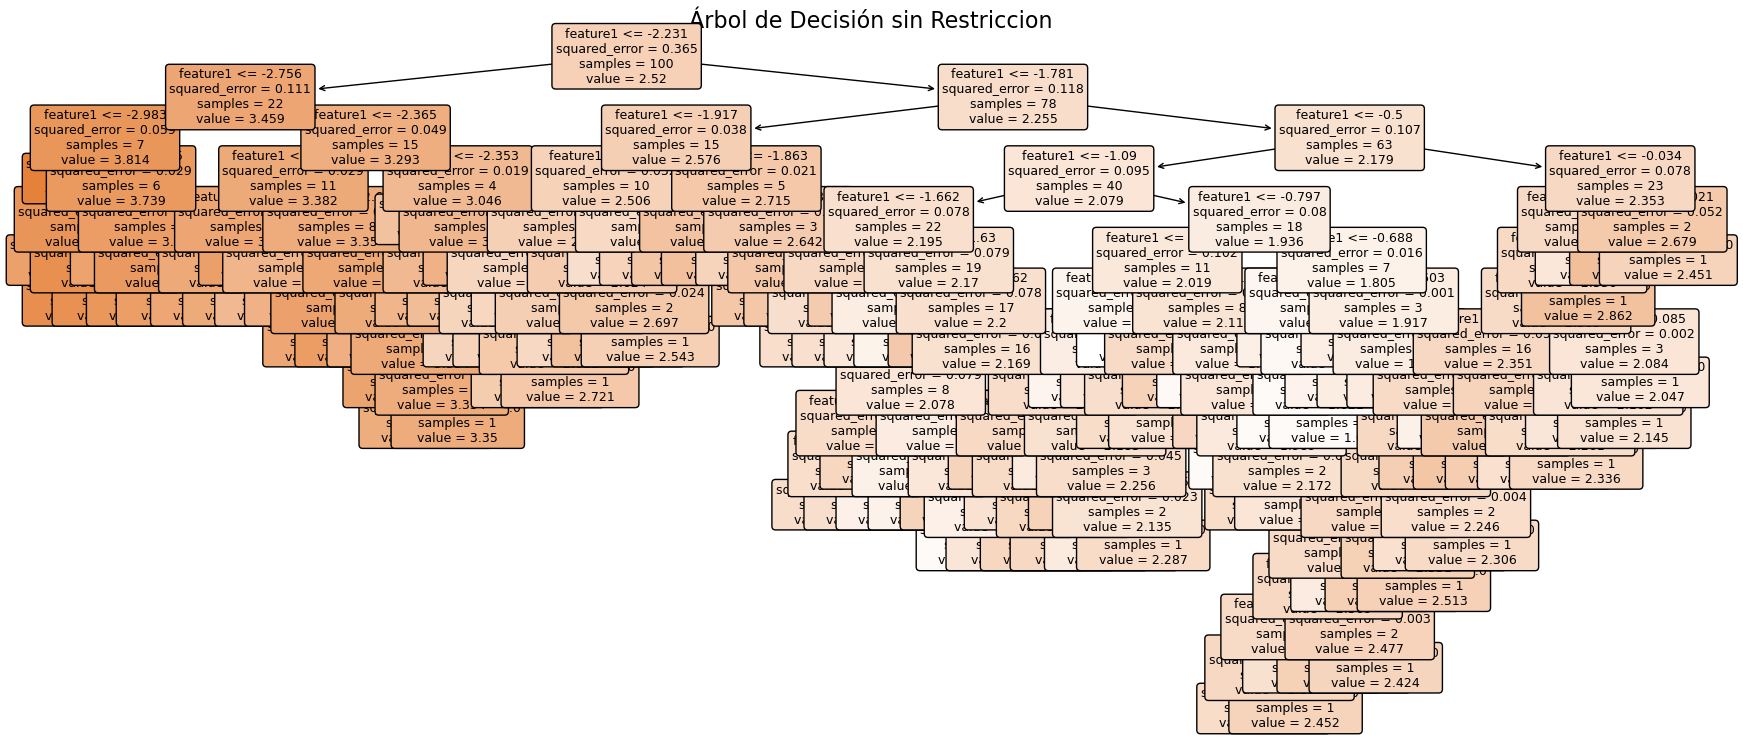

In [114]:
#Gráficalo y asómbrate 
plt.figure(figsize=(21, 9))

tree.plot_tree(tree_r, rounded=True, filled=True, fontsize=9, feature_names=['feature1', 'feature2', 'feature3'], class_names=['class1', 'class2'])

# Añadir un título
plt.title("Árbol de Decisión sin Restriccion", fontsize=16)

# Mostrar la gráfica
plt.show()